Note: you may need to restart the kernel to use updated packages.


C:\Users\Yohanan\AppData\Local\Temp\ipykernel_11884\2516511656.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent = pd.read_csv("data/brent_oil_prices.csv", parse_dates=["Date"])


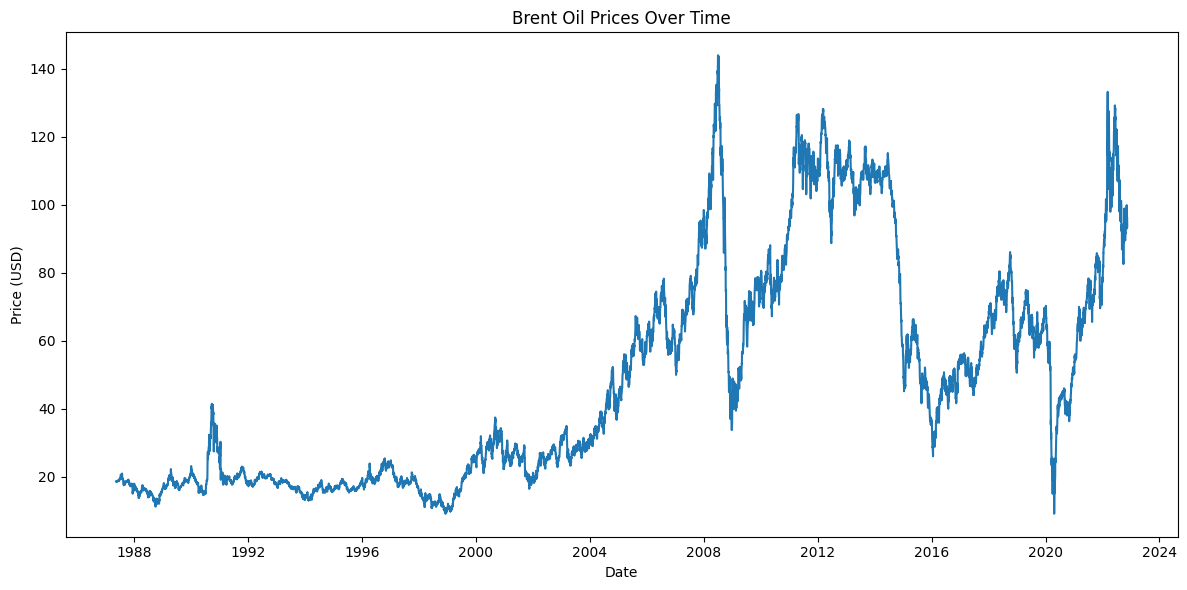

ADF Test Results: {'ADF Statistic': np.float64(-1.9938560113924675), 'p-value': np.float64(0.28927350489340287), 'Stationary': np.False_}


<Figure size 1200x600 with 0 Axes>

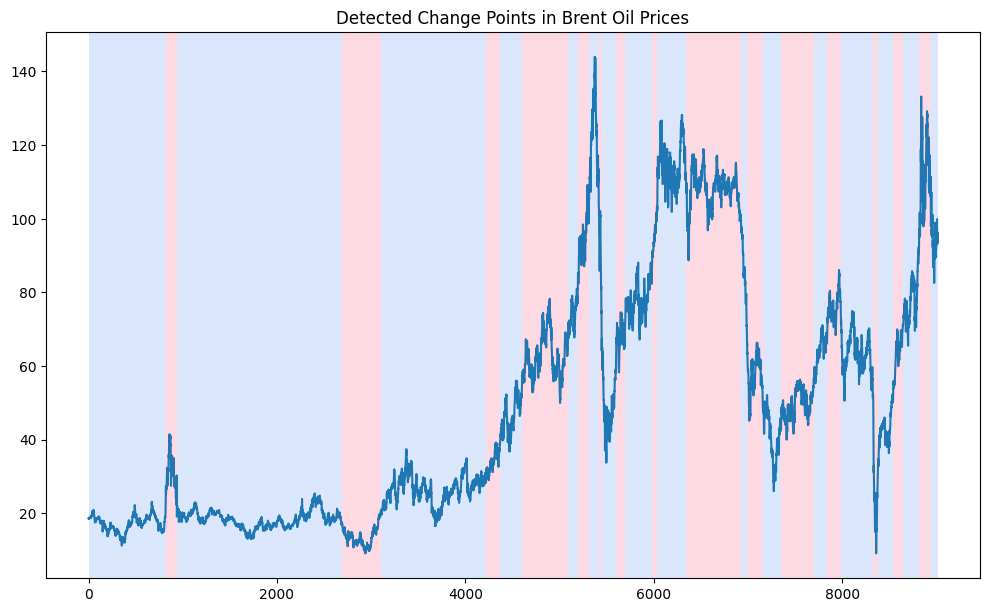

In [3]:
# brent_oil_analysis

%pip install pandas matplotlib seaborn statsmodels ruptures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
import ruptures as rpt  # for change point detection

# Step 2: Load Brent oil price data
brent = pd.read_csv("data/brent_oil_prices.csv", parse_dates=["Date"])
brent.set_index("Date", inplace=True)

# Step 3: Visualize time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=brent, x=brent.index, y="Price")
plt.title("Brent Oil Prices Over Time")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Step 4: Check stationarity (ADF test)
def check_stationarity(series):
    result = adfuller(series.dropna())
    return {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Stationary": result[1] < 0.05
    }

stationarity = check_stationarity(brent["Price"])
print("ADF Test Results:", stationarity)

# Step 5: Identify change points
signal = brent["Price"].values
model = rpt.Pelt(model="rbf").fit(signal)
breaks = model.predict(pen=10)

# Step 6: Plot change points
plt.figure(figsize=(12, 6))
rpt.display(signal, breaks, figsize=(10, 6))
plt.title("Detected Change Points in Brent Oil Prices")
plt.show()
